In [53]:
# %load ../uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from math import floor, ceil

# Script to add the entire project directory structure to the python path
import sys, os

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
	parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
	sys.path.append(p)

# And standard list of subdirectories
if '%s\\pyuoi' % p not in sys.path:
	sys.path.append('%s\\pyuoi' % p)

from pyuoi.linear_model.lasso import UoI_Lasso
from pyuoi.linear_model.elasticnet import UoI_ElasticNet

if '%s\\uoicorr' % p not in sys.path:
    sys.path.append('%s\\uoicorr' % p)

from postprocess import postprocess_file, postprocess_dir
from utils import FNR, FPR, selection_accuracy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dat_uoil = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\01102019', True)

(120, 16)


In [101]:
uoien = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\01132019b', True)

(120, 16)


In [99]:
uoien.iloc[0]

beta_hats              [[0.0, -0.6551894621662324, 0.0, 0.0, 0.0, 2.3...
betadist                                                         uniform
betas                  [[0.0, 0.0, 0.0, 0.0, 0.0, 2.847724951931813, ...
block_size                                                             6
const_beta                                                         False
cov_params                                          {'correlation': 0.0}
cov_type                                                           block
est_reg                                                                0
est_score                                                             r2
exp_type                                                        UoILasso
fn                     [0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 2.0, ...
fp                     [6.0, 7.0, 6.0, 5.0, 14.0, 8.0, 17.0, 10.0, 9....
kappa                                                                0.3
l1_ratios                         [0.1, 0.2, 0.5, 0

In [4]:
dat_en = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\01142019b', True)

(120, 16)


In [129]:
data = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\02082019b')

(420, 25)


### First stick to R^2 estimation scores

In [130]:
uoil = data.loc[data['exp_type'] == 'UoILasso']
uoien = data.loc[data['exp_type'] == 'UoIElasticNet']
en = data.loc[data['exp_type'] == 'EN']

### False negative rates

In [131]:
# Make separate plots for each sparsity, plot as a function of falloff distance

# Select the relevant data:
dat_uoil = []
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.2)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.4)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.6)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.8)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 1)])

# Select the relevant data:
dat_uoien = []
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.2)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.4)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.6)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.8)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 1)])

# Select the relevant data:
dat_en = []
dat_en.append(en.loc[(en['sparsity'] == 0.2)])
dat_en.append(en.loc[(en['sparsity'] == 0.4)])
dat_en.append(en.loc[(en['sparsity'] == 0.6)])
dat_en.append(en.loc[(en['sparsity'] == 0.8)])
dat_en.append(en.loc[(en['sparsity'] == 1)])

In [106]:
dat_uoien[1|].shape

SyntaxError: invalid syntax (<ipython-input-106-2892a7a2a9b2>, line 1)

In [59]:
from utils import FNR, FPR, selection_accuracy

In [77]:
dat_en[0].iloc[0].beta_hats.shape

(50, 60)

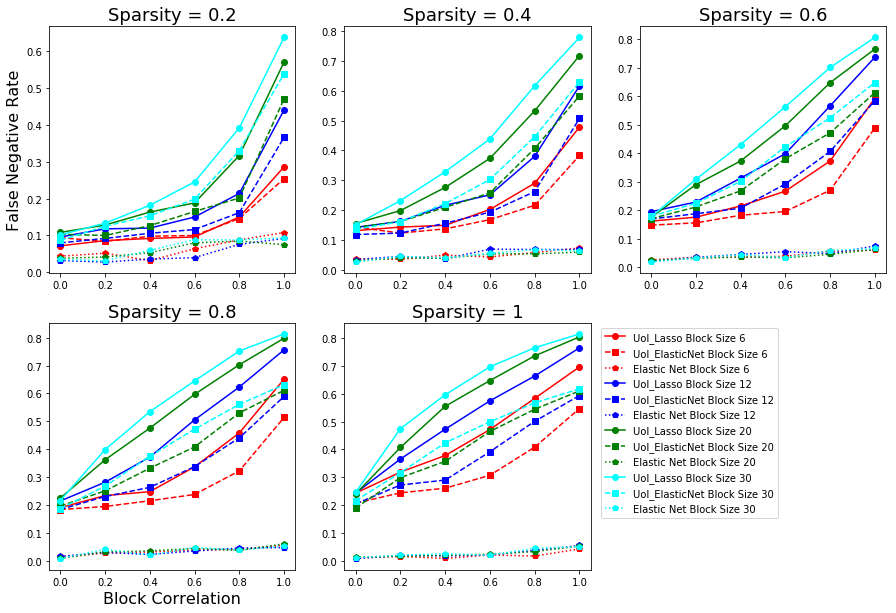

In [132]:
correlation = [0, 0.2, 0.4, 0.6, 0.8, 1]
block_size = [6, 12, 20, 30]
# Match block size colors
colors = ['red', 'blue', 'green', 'cyan']
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

for i in range(len(dat_uoil)):
    a = ax[np.unravel_index(i, (2, 3))]
    for j, b in enumerate(block_size):
        d1 = dat_uoil[i].loc[dat_uoil[i]['block_size'] == b]
        d2 = dat_uoien[i].loc[dat_uoien[i]['block_size'] == b]
        d3 = dat_en[i].loc[dat_en[i]['block_size'] == b]

        # Organize by block_size and correlation
        fn_avg_uoil = [np.mean(FNR(d1.iloc[j].betas, d1.iloc[j].beta_hats)) for j in range(len(correlation))]
        fn_avg_uoien = [np.mean(FNR(d2.iloc[j].betas, d2.iloc[j].beta_hats)) for j in range(len(correlation))]
        fn_avg_en = [np.mean(FNR(d3.iloc[j].betas, d3.iloc[j].beta_hats)) for j in range(len(correlation))]

        a.plot(correlation, fn_avg_uoil, '-o', color = colors[j])
        a.plot(correlation, fn_avg_uoien, '--s', color = colors[j])
        a.plot(correlation, fn_avg_en, ':p', color = colors[j])
    
fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('False Negative Rate', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Block Correlation', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['UoI_Lasso Block Size 6', 'UoI_ElasticNet Block Size 6', 'Elastic Net Block Size 6',
                                        'UoI_Lasso Block Size 12', 'UoI_ElasticNet Block Size 12', 'Elastic Net Block Size 12',
                                        'UoI_Lasso Block Size 20', 'UoI_ElasticNet Block Size 20', 'Elastic Net Block Size 20',
                                        'UoI_Lasso Block Size 30', 'UoI_ElasticNet Block Size 30', 'Elastic Net Block Size 30'],
                                         loc = 'upper right', bbox_to_anchor=(1.78, 1))
#plt.savefig('C:\\Users\\akumar\\nse\\uoicorr\\figs\\02102019/block_fn.png')

In [116]:
x = dat_uoien[0].loc[dat_uoien[0]['block_size'] == 12]

In [119]:
x.iloc[-1].fn

array([[0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [3.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [3.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [3.],
       [0.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.]])

In [125]:
xx = data.loc[(data['exp_type'] == 'UoIElasticNet') & (data['block_size'] == 12) & (data['sparsity'] == 0.2)]

In [126]:
xx.iloc[-1].fn

array([ 9.,  7., 10., 10.,  9., 10., 10.,  8.,  8.,  7.,  9., 10., 10.,
       10.,  9.,  7.,  8.,  9.,  9., 10.,  8., 10.,  8.,  9.,  6., 10.,
       10.,  8.,  9.,  9.,  7.,  8.,  7.,  8.,  8.,  9.,  8.,  9.,  9.,
        8., 10.,  8.,  7.,  7.,  8.,  9., 10.,  8.,  8., 10.])

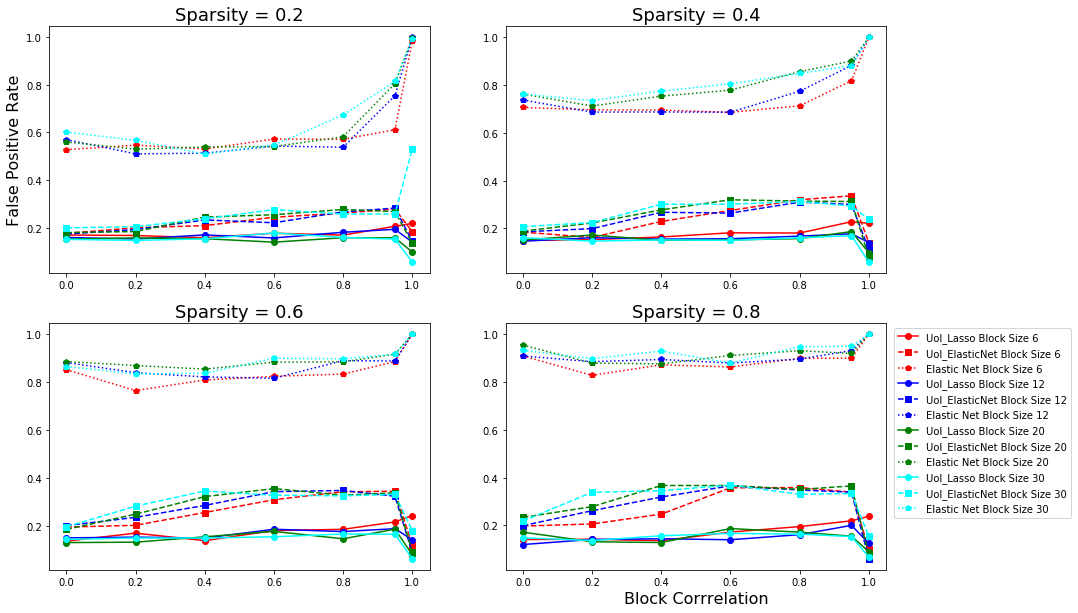

In [79]:
correlation = [0, 0.2, 0.4, 0.6, 0.8, 0.95, 1]
block_size = [6, 12, 20, 30]
# Match block size colors
colors = ['red', 'blue', 'green', 'cyan']
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 2, figsize = (15, 10))

for i in range(len(dat_uoil) - 1):
    a = ax[np.unravel_index(i, (2, 2))]
    for j, b in enumerate(block_size):
        d1 = dat_uoil[i].loc[dat_uoil[i]['block_size'] == b]
        d2 = dat_uoien[i].loc[dat_uoien[i]['block_size'] == b]
        d3 = dat_en[i].loc[dat_en[i]['block_size'] == b]

        # Organize by block_size and correlation
        fp_avg_uoil = [np.mean(FPR(d1.iloc[j].betas, d1.iloc[j].beta_hats)) for j in range(len(correlation))]
        fp_avg_uoien = [np.mean(FPR(d2.iloc[j].betas, d2.iloc[j].beta_hats)) for j in range(len(correlation))]
        fp_avg_en = [np.mean(FPR(d3.iloc[j].betas, d3.iloc[j].beta_hats)) for j in range(len(correlation))]

        a.plot(correlation, fp_avg_uoil, '-o', color = colors[j])
        a.plot(correlation, fp_avg_uoien, '--s', color = colors[j])
        a.plot(correlation, fp_avg_en, ':p', color = colors[j])
    
ax[np.unravel_index(0, (2, 2))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 2))].set_ylabel('False Positive Rate', fontsize=16)
ax[np.unravel_index(1, (2, 2))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 2))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 2))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 2))].set_xlabel('Block Corrrelation', fontsize=16)
ax[np.unravel_index(3, (2, 2))].legend(['UoI_Lasso Block Size 6', 'UoI_ElasticNet Block Size 6', 'Elastic Net Block Size 6',
                                        'UoI_Lasso Block Size 12', 'UoI_ElasticNet Block Size 12', 'Elastic Net Block Size 12',
                                        'UoI_Lasso Block Size 20', 'UoI_ElasticNet Block Size 20', 'Elastic Net Block Size 20',
                                        'UoI_Lasso Block Size 30', 'UoI_ElasticNet Block Size 30', 'Elastic Net Block Size 30'],
                                         loc = 'upper right', bbox_to_anchor=(1.5, 1))
plt.savefig('C:\\Users\\akumar\\nse\\uoicorr\\figs\\02102019/block_fp.png')

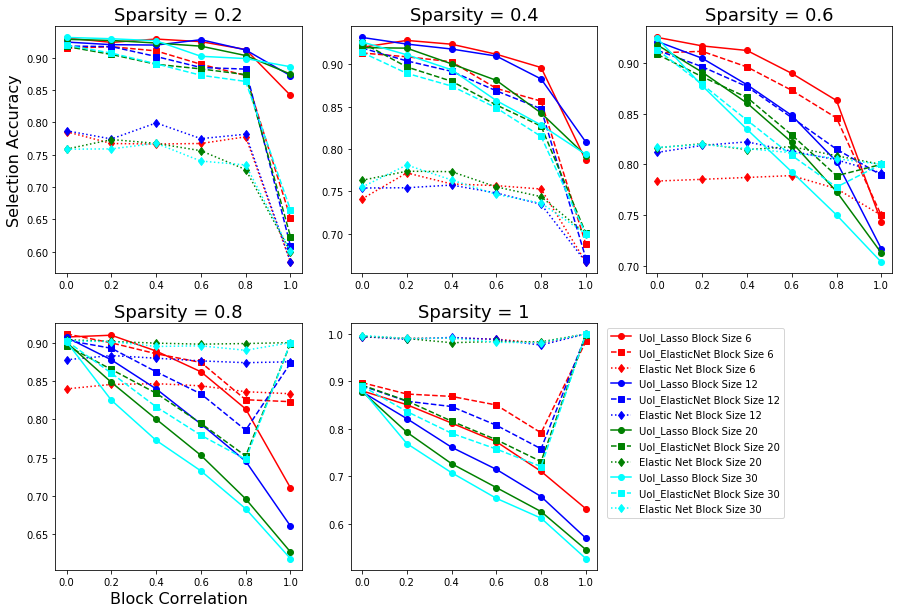

In [42]:
correlation = [0, 0.2, 0.4, 0.6, 0.8, 0.95, 1]
block_size = [6, 12, 20, 30]
# Match block size colors
colors = ['red', 'blue', 'green', 'cyan']
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

for i in range(len(dat_uoil)):
    a = ax[np.unravel_index(i, (2, 3))]
    for j, b in enumerate(block_size):
        d1 = dat_uoil[i].loc[dat_uoil[i]['block_size'] == b]
        d2 = dat_uoien[i].loc[dat_uoien[i]['block_size'] == b]
        d3 = dat_en[i].loc[dat_en[i]['block_size'] == b]

        # Organize by block_size and correlation
        sa_avg_uoil = [np.mean(selection_accuracy(d1.iloc[j].betas, d1.iloc[j].beta_hats)) for j in range(len(correlation))]
        sa_avg_uoien = [np.mean(selection_accuracy(d2.iloc[j].betas, d2.iloc[j].beta_hats)) for j in range(len(correlation))]
        sa_avg_en = [np.mean(selection_accuracy(d3.iloc[j].betas, d3.iloc[j].beta_hats)) for j in range(len(correlation))]

        a.plot(correlation, sa_avg_uoil, '-o', color = colors[j])
        a.plot(correlation, sa_avg_uoien, '--s', color = colors[j])
        a.plot(correlation, sa_avg_en, ':d', color = colors[j])
    
fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('Selection Accuracy', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Block Correlation', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['UoI_Lasso Block Size 6', 'UoI_ElasticNet Block Size 6', 'Elastic Net Block Size 6',
                                        'UoI_Lasso Block Size 12', 'UoI_ElasticNet Block Size 12', 'Elastic Net Block Size 12',
                                        'UoI_Lasso Block Size 20', 'UoI_ElasticNet Block Size 20', 'Elastic Net Block Size 20',
                                        'UoI_Lasso Block Size 30', 'UoI_ElasticNet Block Size 30', 'Elastic Net Block Size 30'],
                                         loc = 'upper right', bbox_to_anchor=(1.78, 1))
plt.savefig('C:\\Users\\akumar\\nse\\uoicorr\\figs\\revisions/block_sa.png')

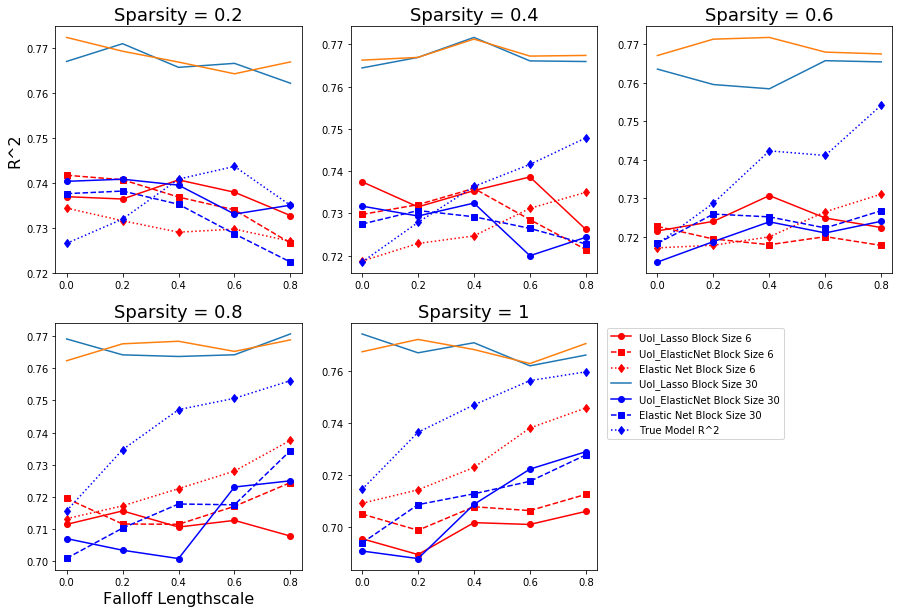

In [134]:
correlation = [0, 0.2, 0.4, 0.6, 0.8]
block_size = [6, 30]
# Match block size colors
colors = ['red', 'blue', 'green', 'cyan']
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

for i in range(len(dat_uoil)):
    a = ax[np.unravel_index(i, (2, 3))]
    for j, b in enumerate(block_size):
        d1 = dat_uoil[i].loc[dat_uoil[i]['block_size'] == b]
        d2 = dat_uoien[i].loc[dat_uoien[i]['block_size'] == b]
        d3 = dat_en[i].loc[dat_en[i]['block_size'] == b]

        nonzero_beta = int(sparsity[i] * 60)

        # Organize by block_size and L
        r2_avg_uoil = [np.mean(d1.iloc[j].r2) for j in range(len(correlation))]
        r2_avg_uoien = [np.mean(d2.iloc[j].r2) for j in range(len(correlation))]
        r2_avg_en = [np.mean(d3.iloc[j].r2) for j in range(len(correlation))]

        r2t_avg_uoil = [np.mean(d1.iloc[j].r2_true) for j in range(len(correlation))]
        r2t_avg_uoien = [np.mean(d2.iloc[j].r2_true) for j in range(len(correlation))]
        r2t_avg_en = [np.mean(d3.iloc[j].r2_true) for j in range(len(correlation))]

        r2t_avg = 1/3 * (np.array(r2t_avg_uoil) + np.array(r2t_avg_uoien) + np.array(r2t_avg_en))
        
        a.plot(correlation, r2_avg_uoil, '-o', color = colors[j])
        a.plot(correlation, r2_avg_uoien, '--s', color = colors[j])
        a.plot(correlation, r2_avg_en, ':d', color = colors[j])
        a.plot(correlation, r2t_avg_uoien)
        
        
#    a.plot(correlation, r2t_avg, '--', color = 'green')
    
    
fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('R^2', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Falloff Lengthscale', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['UoI_Lasso Block Size 6', 'UoI_ElasticNet Block Size 6', 'Elastic Net Block Size 6',
                                        'UoI_Lasso Block Size 30', 'UoI_ElasticNet Block Size 30', 'Elastic Net Block Size 30',
                                        'True Model R^2'], bbox_to_anchor=(1.78, 1))
#plt.savefig('C:\\Users\\akumar\\nse\\uoicorr\\figs\\revisions/block_r2.png')

In [139]:
data = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\02082019b')
uoil = data.loc[data['exp_type'] == 'UoILasso']
uoien = data.loc[data['exp_type'] == 'UoIElasticNet']
en = data.loc[data['exp_type'] == 'EN']

# Make separate plots for each sparsity, plot as a function of falloff distance

# Select the relevant data:
dat_uoil = []
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.2)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.4)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.6)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 0.8)])
dat_uoil.append(uoil.loc[(uoil['sparsity'] == 1)])

# Select the relevant data:
dat_uoien = []
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.2)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.4)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.6)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 0.8)])
dat_uoien.append(uoien.loc[(uoien['sparsity'] == 1)])

# Select the relevant data:
dat_en = []
dat_en.append(en.loc[(en['sparsity'] == 0.2)])
dat_en.append(en.loc[(en['sparsity'] == 0.4)])
dat_en.append(en.loc[(en['sparsity'] == 0.6)])
dat_en.append(en.loc[(en['sparsity'] == 0.8)])
dat_en.append(en.loc[(en['sparsity'] == 1)])

(420, 28)


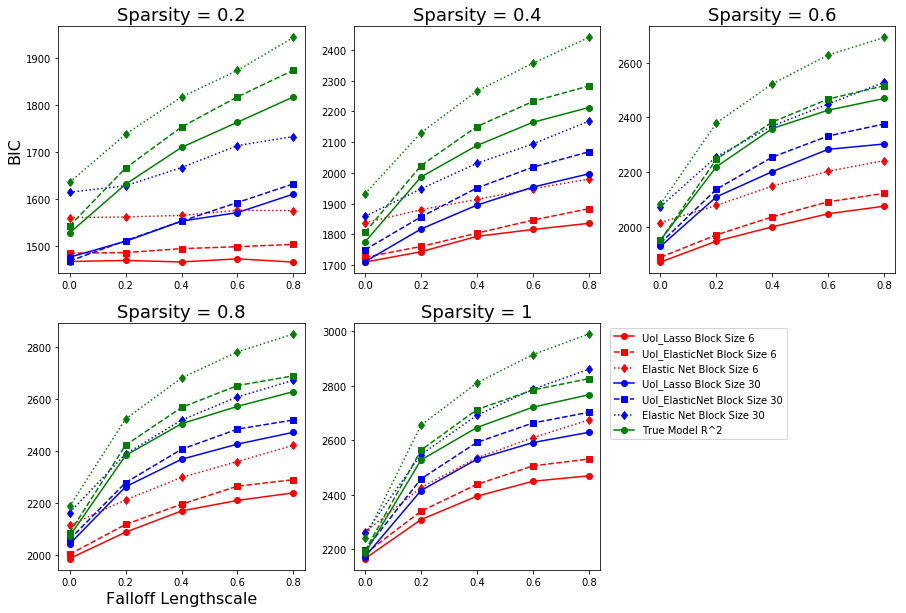

In [145]:
# Plot BIC, AIC

correlation = [0, 0.2, 0.4, 0.6, 0.8]
block_size = [6, 12, 20]
# Match block size colors
colors = ['red', 'blue', 'green', 'cyan']
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

for i in range(len(dat_uoil)):
    a = ax[np.unravel_index(i, (2, 3))]
    for j, b in enumerate(block_size):
        d1 = dat_uoil[i].loc[dat_uoil[i]['block_size'] == b]
        d2 = dat_uoien[i].loc[dat_uoien[i]['block_size'] == b]
        d3 = dat_en[i].loc[dat_en[i]['block_size'] == b]

        nonzero_beta = int(sparsity[i] * 60)

        # Organize by block_size and L
        BIC_avg_uoil = [np.mean(d1.iloc[j].BIC) for j in range(len(correlation))]
        BIC_avg_uoien = [np.mean(d2.iloc[j].BIC) for j in range(len(correlation))]
        BIC_avg_en = [np.mean(d3.iloc[j].BIC) for j in range(len(correlation))]
        
        a.plot(correlation, BIC_avg_uoil, '-o', color = colors[j])
        a.plot(correlation, BIC_avg_uoien, '--s', color = colors[j])
        a.plot(correlation, BIC_avg_en, ':d', color = colors[j])
        
        
#    a.plot(correlation, r2t_avg, '--', color = 'green')
    
    
fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('BIC', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Falloff Lengthscale', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['UoI_Lasso Block Size 6', 'UoI_ElasticNet Block Size 6', 'Elastic Net Block Size 6',
                                        'UoI_Lasso Block Size 30', 'UoI_ElasticNet Block Size 30', 'Elastic Net Block Size 30',
                                        'True Model R^2'], bbox_to_anchor=(1.78, 1))
#plt.savefig('C:\\Users\\akumar\\nse\\uoicorr\\figs\\revisions/block_r2.png')

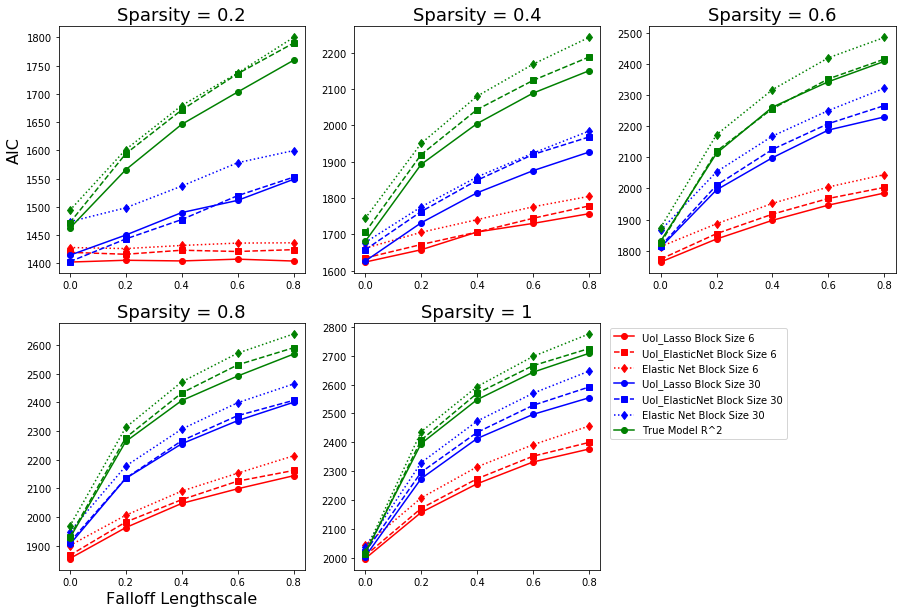

In [146]:
# Plot BIC, AIC

correlation = [0, 0.2, 0.4, 0.6, 0.8]
block_size = [6, 12, 20]
# Match block size colors
colors = ['red', 'blue', 'green', 'cyan']
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

for i in range(len(dat_uoil)):
    a = ax[np.unravel_index(i, (2, 3))]
    for j, b in enumerate(block_size):
        d1 = dat_uoil[i].loc[dat_uoil[i]['block_size'] == b]
        d2 = dat_uoien[i].loc[dat_uoien[i]['block_size'] == b]
        d3 = dat_en[i].loc[dat_en[i]['block_size'] == b]

        nonzero_beta = int(sparsity[i] * 60)

        # Organize by block_size and L
        AIC_avg_uoil = [np.mean(d1.iloc[j].AIC) for j in range(len(correlation))]
        AIC_avg_uoien = [np.mean(d2.iloc[j].AIC) for j in range(len(correlation))]
        AIC_avg_en = [np.mean(d3.iloc[j].AIC) for j in range(len(correlation))]
        
        a.plot(correlation, AIC_avg_uoil, '-o', color = colors[j])
        a.plot(correlation, AIC_avg_uoien, '--s', color = colors[j])
        a.plot(correlation, AIC_avg_en, ':d', color = colors[j])
        
        
#    a.plot(correlation, r2t_avg, '--', color = 'green')
    
    
fig.delaxes(ax[1, 2])
ax[np.unravel_index(0, (2, 3))].set_title('Sparsity = 0.2', fontsize=18)
ax[np.unravel_index(0, (2, 3))].set_ylabel('AIC', fontsize=16)
ax[np.unravel_index(1, (2, 3))].set_title('Sparsity = 0.4', fontsize=18)
ax[np.unravel_index(2, (2, 3))].set_title('Sparsity = 0.6', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_title('Sparsity = 0.8', fontsize=18)
ax[np.unravel_index(3, (2, 3))].set_xlabel('Falloff Lengthscale', fontsize=16)
ax[np.unravel_index(4, (2, 3))].set_title('Sparsity = 1', fontsize=18)
ax[np.unravel_index(4, (2, 3))].legend(['UoI_Lasso Block Size 6', 'UoI_ElasticNet Block Size 6', 'Elastic Net Block Size 6',
                                        'UoI_Lasso Block Size 30', 'UoI_ElasticNet Block Size 30', 'Elastic Net Block Size 30',
                                        'True Model R^2'], bbox_to_anchor=(1.78, 1))
#plt.savefig('C:\\Users\\akumar\\nse\\uoicorr\\figs\\revisions/block_r2.png')